# Trends in Spotify data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/somyakatiyar/DS-project/839826c10746ecca2c21f08106fa702b879b6b46/converted_spotify_songs%20(1).csv"

spotify = pd.read_csv(url)

print(f"The dataset contains {spotify.shape[0]} rows and {spotify.shape[1]} columns.")

spotify.head()

The dataset contains 4600 rows and 29 columns.


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


The data source we are using is originally from Kaggle. This dataset presents a comprehensive compilation of the most streamed songs on Spotify in 2024. It provides insights into each track's attributes, popularity, and presence on various music platforms, and more offering a valuable resource for music analysts, enthusiasts, and industry professionals. The dataset includes information such as track name, artist, release date, ISRC, streaming statistics, and presence on platforms like YouTube, TikTok, and more. In this project, we wanted to take our passion for music and delve deeper into the analysis of the data behind it. One of the main scientific quesitons that we were wanting to answer is the trend in music popularity, analyzing relationships between the different variables provided, and taking the ones that stood out to us the most to analyze them further. Another scientific question we wanted to answer was the track performance across all the different music platforms like Spotify, Deezer, Pandora, etc. and how it correlates with the overall popularity and streams.

In [ ]:
url = "https://raw.githubusercontent.com/somyakatiyar/DS-project/839826c10746ecca2c21f08106fa702b879b6b46/converted_spotify_songs%20(1).csv"

spotify = pd.read_csv(url)

spotify_clean = spotify.apply(lambda x: x.str.replace(',', '') if x.dtype == "object" else x)

spotify_clean['Spotify Streams'] = pd.to_numeric(spotify_clean['Spotify Streams'], errors='coerce')
spotify_clean['Spotify Popularity'] = pd.to_numeric(spotify_clean['Spotify Popularity'], errors='coerce')

print(spotify_clean.head())

print(f"The dataset contains {spotify_clean.shape[0]} rows and {spotify_clean.shape[1]} columns.")


                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score  Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     3.904709e+08   
1     5/4/2024  USUG12400910             2        545.9     3.237039e+08   
2    3/19/2024  QZJ842400387             3        538.4     6.013093e+08   
3    1/12/2023  USSM12209777             4        444.9     2.031281e+09   
4    5/31/2024  USUG12403398             5        423.3     1.070349e+08   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins

We gathered our data from Kaggle and then uploaded it to Github for easier accessibility. This allowed for users to directly access the data by clicking on the Github URL. Once the data was collected we cleaned and processed it to ensure the dataset is ready for analysis. This included handling missing values and converting columns to numeric types.   

In [ ]:
spotify_clean.describe()

,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,4.487000e+03,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,4.473873e+08,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,5.384439e+08,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.071000e+03,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,7.038630e+07,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,2.398507e+08,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,6.283638e+08,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,4.281469e+09,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [ ]:
spotify_clean = spotify_clean[(spotify_clean['Spotify Streams'] > 0) & (spotify_clean['Spotify Popularity'] > 0)]

print(f"Rows after filtering: {spotify_clean.shape[0]}")


Rows after filtering: 3781


The parsing that we completed consisted of cleaning the data so we could make surther analysis and visualizations, since our data included a lot of NaNs, as well as commas for the numbers bigger than 999.  This step was handled using a lightweight parsing pipeline that involved cleaning formatted number, type conversion, and filtering.  The most used column of out data was the spotify streams column and many of those numbers were in the millions and billions which included a lot of commas.  A lambda function was applied across all column to remove commas and create a standardized numeric format.  Next, we still needed to complete a little cleaning reguarding needing to convert to numerical types.  We completed this using pd.to_numeric(), with the errors = 'coerce' argument.  This made sure that any non-convertible values would be handled as NaN values.  Lastly, we used basic filtering steps to make sure that no rows with missing or invalid values were included in the regression and correlation analysis.  All of the parsin was relatively simple, yet had a huge impact on the visualization of our analysis.

# Below each visualization, we will give a brief description.

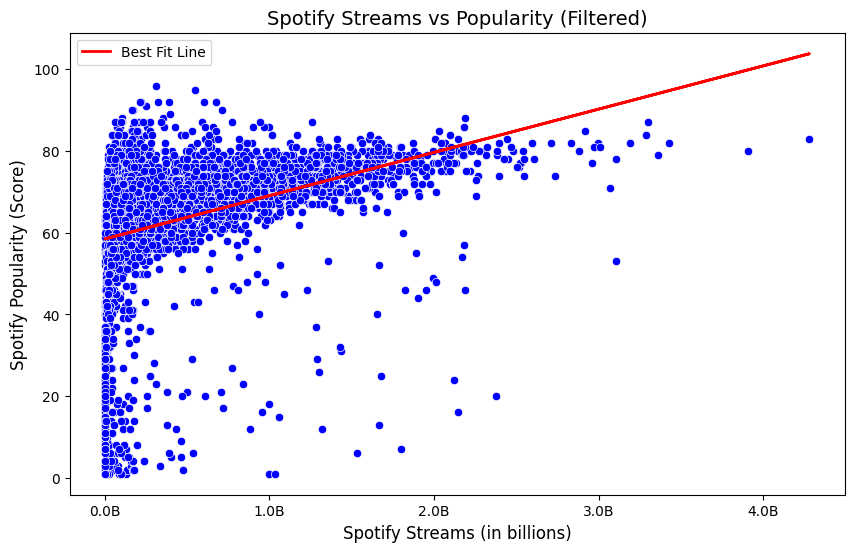

In [ ]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = spotify_clean[['Spotify Streams']]
y = spotify_clean['Spotify Popularity']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_clean, x='Spotify Streams', y='Spotify Popularity', color='blue')

plt.plot(spotify_clean['Spotify Streams'], y_pred, color='red', linewidth=2, label='Best Fit Line')

plt.title('Spotify Streams vs Popularity (Filtered)', fontsize=14)
plt.xlabel('Spotify Streams (in billions)', fontsize=12)
plt.ylabel('Spotify Popularity (Score)', fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B'))

plt.legend()

plt.show()


The dots represent the individual songs, and is showing the relationship between Spotify streams (in billions) and the Spotify popularity score. The red line is showing the linear regression of a positive trend, as the number of streams increases the popularity score rises. The scatter plot is right skewed with most songs being under 1 billion streams.  The popularity is associated with higher total streams. However, correlation isn’t perfect with some songs around 1 billion streams have a lower popularity score (around 60) indicating there are other factors at play like the release date, recent activity, playlist placements, etc.

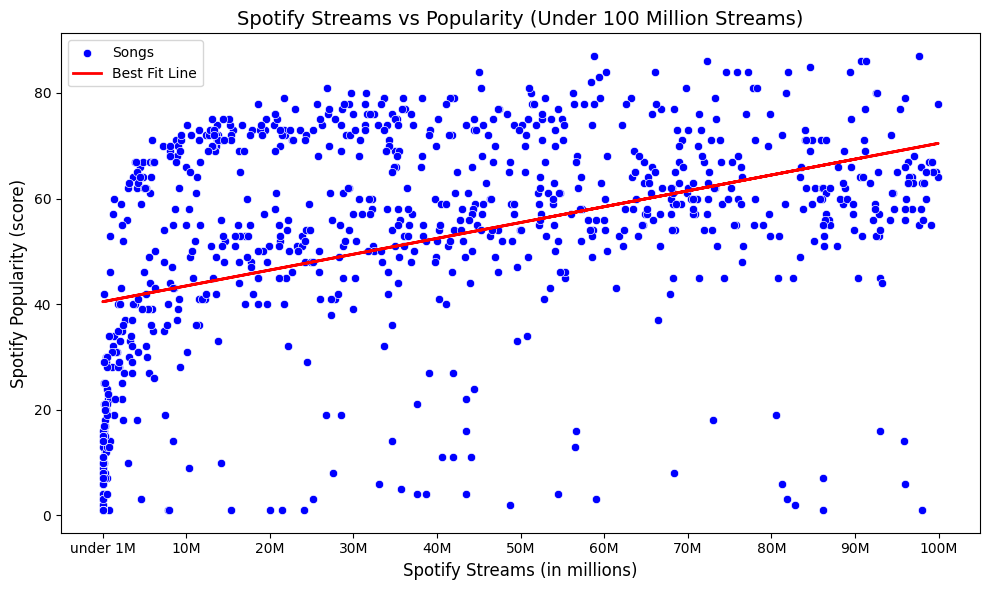

In [ ]:
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

spotify_clean['Spotify Streams'] = pd.to_numeric(spotify_clean['Spotify Streams'], errors='coerce')
spotify_clean['Spotify Popularity'] = pd.to_numeric(spotify_clean['Spotify Popularity'], errors='coerce')

spotify_clean = spotify_clean.dropna(subset=['Spotify Streams', 'Spotify Popularity'])

threshold_streams = 1e8  # 100 million

spotify_under_100m = spotify_clean[spotify_clean['Spotify Streams'] < threshold_streams]

X = spotify_under_100m[['Spotify Streams']]
y = spotify_under_100m['Spotify Popularity']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_under_100m, x='Spotify Streams', y='Spotify Popularity', color='blue', label='Songs')

plt.plot(spotify_under_100m['Spotify Streams'], y_pred, color='red', linewidth=2, label='Best Fit Line')

plt.title('Spotify Streams vs Popularity (Under 100 Million Streams)', fontsize=14)
plt.xlabel('Spotify Streams (in millions)', fontsize=12)
plt.ylabel('Spotify Popularity (score)', fontsize=12)

xticks = plt.gca().get_xticks()

xticks = np.arange(0, 100_000_001, 10_000_000)  # 0, 10M, 20M, ..., 100M

# Format labels: "under 1M" for 0, then "10M", "20M", etc.
xtick_labels = ["under 1M"] + [f"{int(x/1e6)}M" for x in xticks[1:]]

plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xtick_labels)


# Add legend and show plot
plt.legend()
plt.tight_layout()
plt.show()



This graph shows the relationship between Spotify streams (under 100 million) and popularity score. There is a positive correlation between streams and popularity. The linear regression line shows a positive trend as number of streams increase the popularity score increases as well. As shown in the plot, A large number of songs have fewer than 10 million streams, with popularity scores spread widely between 40 and 60. The scatter reveals considerable noise — especially for songs with fewer than 10M streams. This suggests that Spotify’s popularity metric is influenced by more than just stream count, such as recency, playlist placements, and user engagement behaviors.

### Spotify streams vs. Spotify popularity score:
A scatter plot was created to examine the relationship between total spotify streams (in billions) and the platform's popularity score.  We created a regression line to identify a consistent trend if there was any.  The analysis showed a positive but non-linear relationship solidifying the fact that songs with a higher stream count generally had a higher population score.  This was not perfect, as there were still songs with very high stream counts and lower scores.  There could be many reasons as to why there were outliers, including a shift in algorithm, playlist rotation, or how old the song is.

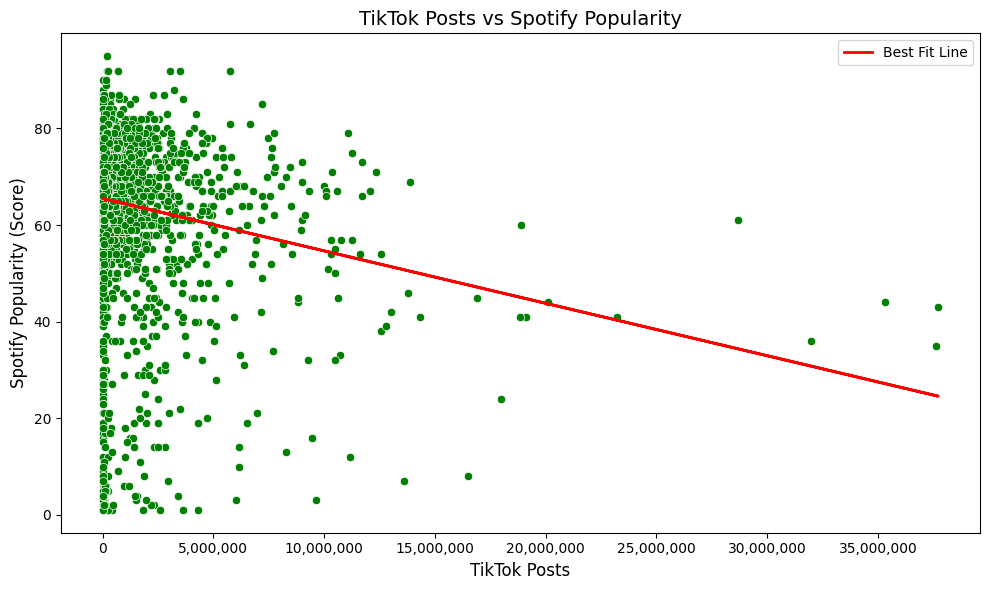

In [ ]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Remove commas and convert TikTok Posts to numeric
spotify['TikTok Posts'] = spotify['TikTok Posts'].replace(',', '', regex=True)
spotify['TikTok Posts'] = pd.to_numeric(spotify['TikTok Posts'], errors='coerce')

# Drop rows with missing values in the selected columns
spotify_clean = spotify.dropna(subset=['TikTok Posts', 'Spotify Popularity'])

# Prepare data for regression
X = spotify_clean[['TikTok Posts']]
y = spotify_clean['Spotify Popularity']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_clean, x='TikTok Posts', y='Spotify Popularity', color='green')

# Line of best fit
plt.plot(spotify_clean['TikTok Posts'], y_pred, color='red', linewidth=2, label='Best Fit Line')

# Titles and labels
plt.title('TikTok Posts vs Spotify Popularity', fontsize=14)
plt.xlabel('TikTok Posts', fontsize=12)
plt.ylabel('Spotify Popularity (Score)', fontsize=12)

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend()
plt.tight_layout()
plt.show()


This graph shows the relationship between the number user-generated TikTok videos that use the song’s audio and the Spotify popularity. There is a negative correlation where more tik toks are associated with lower Spotify popularity in the dataset. A large cluster of songs with low tik tok posts span a wide range of popularity posts. While the streams are somewhat predictive they are not as tightly correlated in this range, on the other hand, songs with very high tik tok posts count have lower popularity scores clustering around 60-80. This graph ultimately shows that viral success on TikTok doesn’t guarantee long term guarantee on Spotify. Older songs that do blow up on TikTok may not rank high in Spotify’s recency-weighted popularity algorithm.


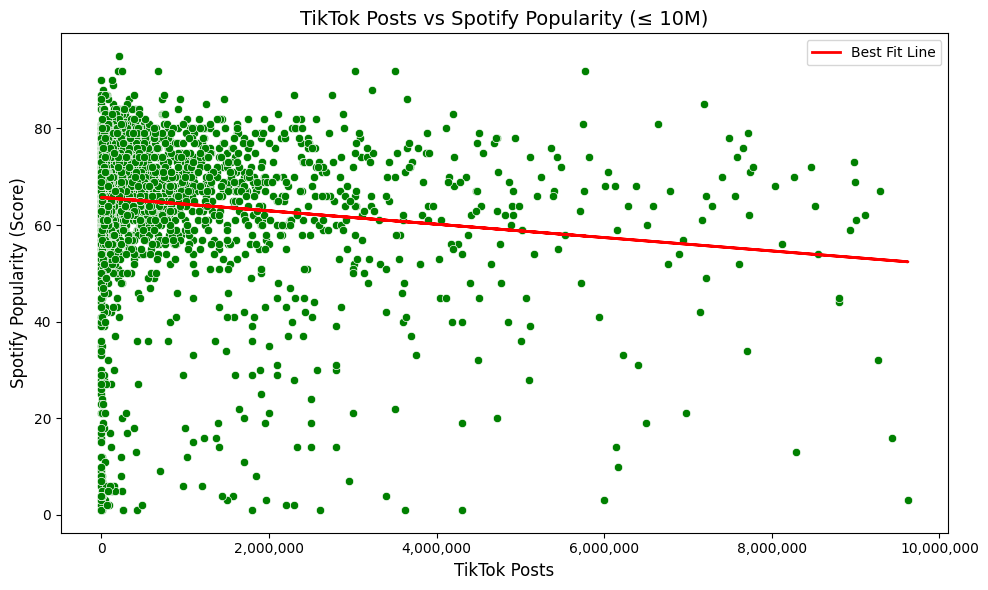

In [ ]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Remove commas and convert TikTok Posts to numeric
spotify['TikTok Posts'] = spotify['TikTok Posts'].replace(',', '', regex=True)
spotify['TikTok Posts'] = pd.to_numeric(spotify['TikTok Posts'], errors='coerce')

# Drop rows with missing values and filter to TikTok Posts <= 10,000,000
spotify_clean = spotify.dropna(subset=['TikTok Posts', 'Spotify Popularity'])
spotify_filtered = spotify_clean[spotify_clean['TikTok Posts'] <= 10_000_000]

# Prepare data for regression
X = spotify_filtered[['TikTok Posts']]
y = spotify_filtered['Spotify Popularity']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_filtered, x='TikTok Posts', y='Spotify Popularity', color='green')

# Line of best fit
plt.plot(spotify_filtered['TikTok Posts'], y_pred, color='red', linewidth=2, label='Best Fit Line')

# Titles and labels
plt.title('TikTok Posts vs Spotify Popularity (≤ 10M)', fontsize=14)
plt.xlabel('TikTok Posts', fontsize=12)
plt.ylabel('Spotify Popularity (Score)', fontsize=12)

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend()
plt.tight_layout()
plt.show()


This graph shows the relationship between the number of Tik Tok posts featuring the song and the song’s popularity score on Spotify. Each green dot represents a song. The TikTok posts plotted on the x-axis and Spotify popularity scores on the y-axis. The red line is the best-fit line, which shows a slight negative correlation between TikTok posts and Spotify popularity. This line suggests that as the number of TikTok posts increases, Spotify popularity tends to decrease marginally, but the spread of data points indicates significant variability. The weak correlation in the graph implies that viral TikToks doesn’t consistently translate into higher Spotify popularity, highlighting the complexity of how social media engagement impacts streaming success.

### TikTok posts vs. Spotify popularity score:
These catterplots visualized the relationship between the amount of TikToks that were posted to a given song, and the spotify popularity (out of 100).  Shockingly, the analysis showed a negative coorelation.  In the dataset, the songs with more TikTok usage had a lower popularity score.  This challenges common assumptions about cross-platform virality, and makes us question why songs that are popular on one platform are not as popular on another.

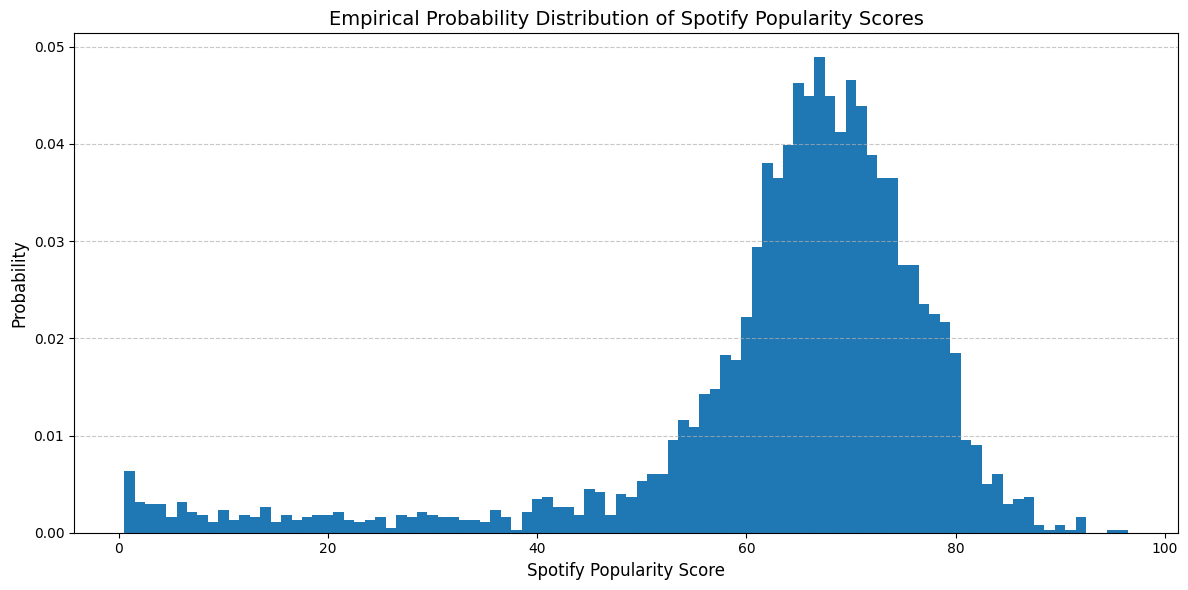

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/somyakatiyar/DS-project/839826c10746ecca2c21f08106fa702b879b6b46/converted_spotify_songs%20(1).csv"
spotify = pd.read_csv(url)

spotify_clean = spotify.apply(lambda x: x.str.replace(',', '') if x.dtype == "object" else x)
spotify_clean['Spotify Streams'] = pd.to_numeric(spotify_clean['Spotify Streams'], errors='coerce')
spotify_clean['Spotify Popularity'] = pd.to_numeric(spotify_clean['Spotify Popularity'], errors='coerce')
spotify_clean = spotify_clean[(spotify_clean['Spotify Streams'] > 0) & (spotify_clean['Spotify Popularity'] > 0)]

popularity_counts = spotify_clean['Spotify Popularity'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(12, 6))
plt.bar(popularity_counts.index, popularity_counts.values, width=1.0)
plt.title('Empirical Probability Distribution of Spotify Popularity Scores', fontsize=14)
plt.xlabel('Spotify Popularity Score', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Implimentation: first we redownloaded the data, and then cleaned it again by removing commas and converting the spotify streams and spotify popularity columns.  Then we filtered out the negative and NaN values.  Next, we calculated the empirical probability distribution of the spotify popularity score using the value_counts(normalize=True) method.  We then visualized this through a histogram where the x axis shows the popularity score, and the probability is on the y axis.

### Histogram of Spotify popularity scores:
The ditribution is left-skewed, meaning that most songs have a high popularity score and very few have a low popularity score.  This reflects correctly, as the dataset included the top songs meaning that they were popular for at least a small duration of time.  The uniformity of high scores also points to a clustering of top hits making it more difficult to differentiate between the small differences in popularity levels.

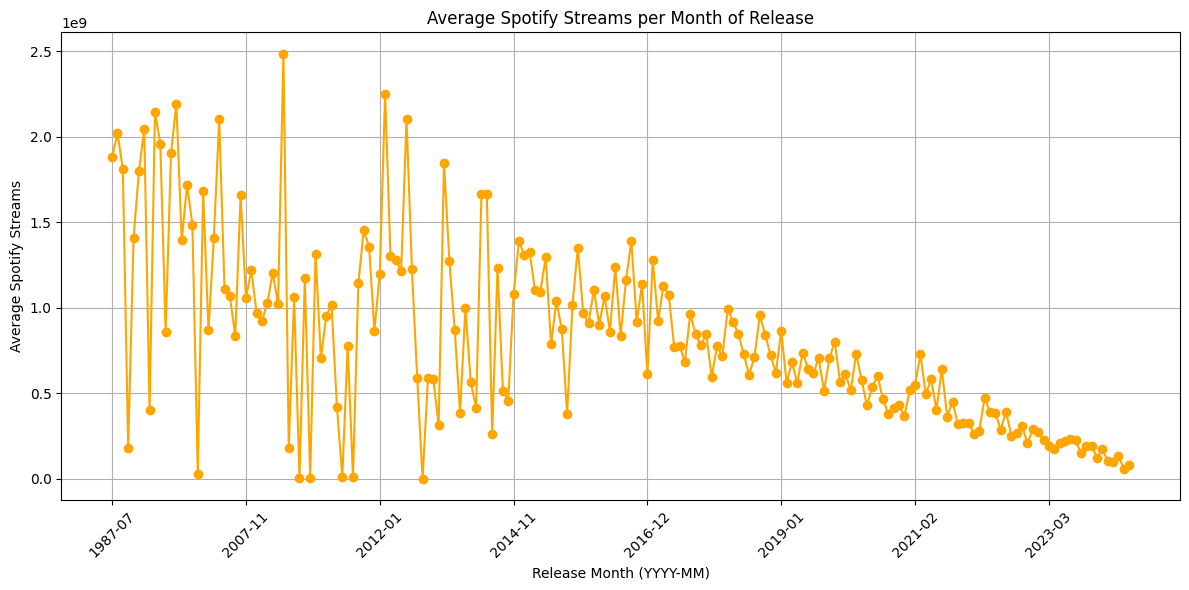

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Recreate the cleaned dataset using the same steps from the notebook
url = "https://raw.githubusercontent.com/somyakatiyar/DS-project/839826c10746ecca2c21f08106fa702b879b6b46/converted_spotify_songs%20(1).csv"
spotify_df = pd.read_csv(url)

# Convert columns
spotify_df['Release Date'] = pd.to_datetime(spotify_df['Release Date'], errors='coerce')
spotify_df['Spotify Streams'] = spotify_df['Spotify Streams'].replace(',', '', regex=True).astype(float)

# Create month column and compute monthly averages
monthly_avg = spotify_df.dropna(subset=['Release Date']).copy()
monthly_avg['Month'] = monthly_avg['Release Date'].dt.to_period('M').astype(str)
monthly_avg_sorted = monthly_avg.groupby('Month')['Spotify Streams'].mean().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_avg_sorted.plot(marker='o', color='orange')
plt.title('Average Spotify Streams per Month of Release')
plt.xlabel('Release Month (YYYY-MM)')
plt.ylabel('Average Spotify Streams')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



The time series plot reveals how average Spotify streams vary by the release month. The graph indicates there are a few months with sharp spikes, which is possibly driven by popular song releases or seasonal music trends.
More recent months tend to show higher average streams, possibly reflecting increasing platform usage or more viral hits. There is variance from month to month, highlighting how release timing may impact average reach. This kind of  analysis is useful for artists and labels to optimize release strategies based on platform behavior and audience engagement patterns. We cleaned the Release Date and Spotify Streams columns by converting dates to datetime format and removed commas from stream numbers to ensure numeric consistency.
Then extracted the release month for each track and calculated the average Spotify streams per month by grouping the data accordingly. Finally plotted the time series using matplotlib, showing how average streaming performance has changed over time. This helps identify trends, seasonal peaks, and long-term shifts in listener behavior.



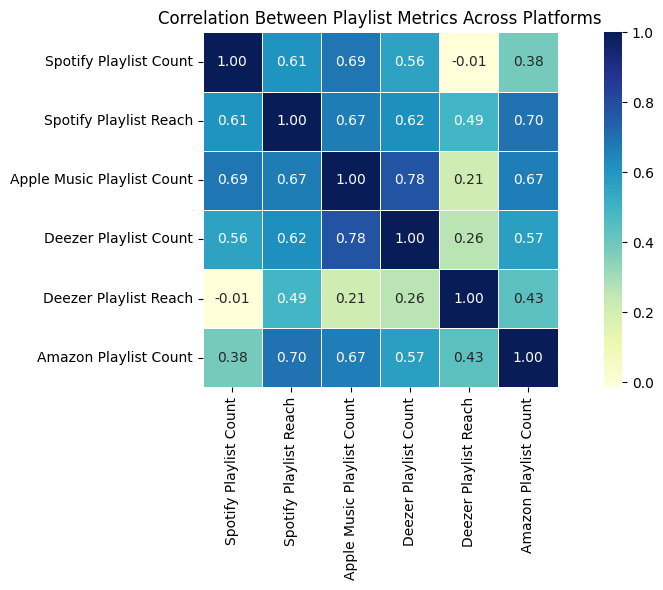

In [ ]:
playlist_cols = [
    'Spotify Playlist Count', 'Spotify Playlist Reach',
    'Apple Music Playlist Count', 'Deezer Playlist Count',
    'Deezer Playlist Reach', 'Amazon Playlist Count'
]

playlist_data = spotify_df[playlist_cols].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

playlist_corr = playlist_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(playlist_corr, annot=True, cmap='YlGnBu', fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Between Playlist Metrics Across Platforms')
plt.tight_layout()
plt.show()


Deezer Playlist Count and Reach have a very strong correlation (about 0.95), indicating that more playlists directly lead to broader reach on Deezer. Spotify Playlist Count and Reach are also strongly linked ( about 0.90), showing consistency between the number of placements and exposure. Cross-platform correlations are weaker, indicating that playlist activity on Spotify doesn’t  predict activity on Apple Music, Amazon, or Deezer — which also implies platform-specific promotion strategies. The heatmap shows a correlation matrix between various platform metrics, more specifically to how there are different types of engagement. This visualizaiton helps show which platforms behave more similarly to each other across songs.

## Conclusion:
This project successfully explored the performance dynamics of popular songs across Spotify and other platforms including TikTok, Apple Music, Deezer, and Amazon, with a majority of our focus on Spotify and TikTok.  Through our visualizations and analysis, the following conclusions were drawn.
Spotify stream count and popularity scores were moderately correlated, which confirmed the idea that a high number of streams would lead to a higher popularity score.  However, there was still a presence of outliers that suggests that Spotify's popularity score cosiders more than just the amount of streams and also includes recent growth rate, playlist appearances, and user engagement.
On the other hand, TikTok audio usage does not correlate positively with Spotify popularity.  This shows a disconnect between a short video using a few seconds to a minute of a song as compared to the full song.  From personal experience as well as the data, we can see that TikTok helps songs gain initial attention, it is not a guarentee that these finding will transfer over positively to the popularity of entire songs on Spotify.
Our progect also emphasized the complexity of platform-specific algorithms showing that content does not behave the same on all platofrms and depends more on the user base, the content itself, and the engagement logic.
One downside of the data included the fact that the dataset lacked timestamps, and it was impossible to know if a songs popularity changed over time, or if other platforms, for example TikTok, had an effect on the popularity at a given time.
In order to gain a better sense at the missed data, an idea could be to incorporate a Spotify API and TikTok scraping tools to build a live and updating dashboard that can track these trends and the effect they have on a givne song at any time.  We could also look at more recent and live data, instead of a whole year, look at a specific month or week to get more up to date data.  
In conclusion, this project provided an important first step in understanding the cross-platform dynamics of music which showed the positives and limitations between different streaming platforms.